In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
df = pd.read_csv("C:/Users/lavis/Downloads/Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [22]:
education_mapping = {
    "PhD": 3,
    "Master's": 2,
    "Bachelor's": 1
}

df['Education Level'] = df['Education Level'].map(education_mapping)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    float64
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.7+ KB


In [24]:
df.describe()

,Age,Education Level,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000
mean,37.431635,1.536193,10.030831,100577.345845
std,7.069073,0.723569,6.557007,48240.013482
min,23.000000,1.000000,0.000000,350.000000
25%,31.000000,1.000000,4.000000,55000.000000
50%,36.000000,1.000000,9.000000,95000.000000
75%,44.000000,2.000000,15.000000,140000.000000
max,53.000000,3.000000,25.000000,250000.000000


In [25]:
df[['Years of Experience', 'Age', 'Salary','Education Level']].isna().sum()

Years of Experience    2
Age                    2
Salary                 2
Education Level        2
dtype: int64

In [27]:
df = df[['Years of Experience', 'Age', 'Salary','Education Level']].dropna()
df[['Years of Experience', 'Age', 'Salary','Education Level']].isna().sum()

Years of Experience    0
Age                    0
Salary                 0
Education Level        0
dtype: int64

In [28]:
X = df[['Years of Experience', 'Age','Education Level']].values
y = df['Salary'].values

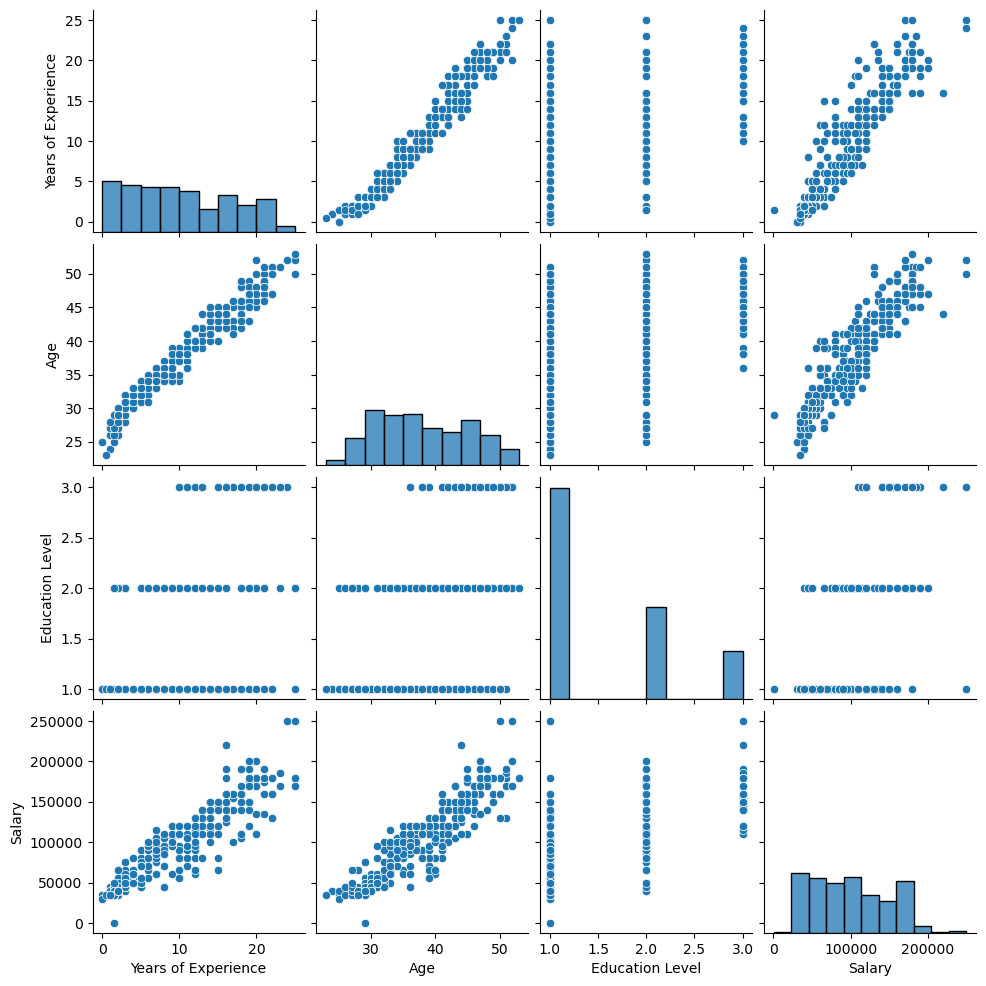

In [29]:
plot_df = pd.DataFrame({
    'Years of Experience': X[:, 0],
    'Age': X[:, 1],
    'Education Level': X[:, 2],
    'Salary': y
})
sns.pairplot(plot_df)
plt.show()

In [30]:
correlation_matrix = plot_df.corr()
correlation_matrix

,Years of Experience,Age,Education Level,Salary
Years of Experience,1.000000,0.979128,0.590863,0.930338
Age,0.979128,1.000000,0.562693,0.922335
Education Level,0.590863,0.562693,1.000000,0.670371
Salary,0.930338,0.922335,0.670371,1.000000


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [33]:
X_train_b = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_b = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [34]:
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    loss_history = []
    
    for i in range(n_iter):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = 2/m * X.T.dot(error)
        theta -= lr * gradients
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {np.mean(error**2):.2f}")
        loss_history.append(np.mean(error**2))
    return theta, loss_history

In [35]:
theta, losses = gradient_descent(X_train_b, y_train, lr=0.01, n_iter=1000)

Iteration 0, Loss: 12321096909.83
Iteration 100, Loss: 426357808.20
Iteration 200, Loss: 251872628.99
Iteration 300, Loss: 248641776.60
Iteration 400, Loss: 248542692.75
Iteration 500, Loss: 248515885.89
Iteration 600, Loss: 248494034.22
Iteration 700, Loss: 248474103.36
Iteration 800, Loss: 248455699.85
Iteration 900, Loss: 248438678.82


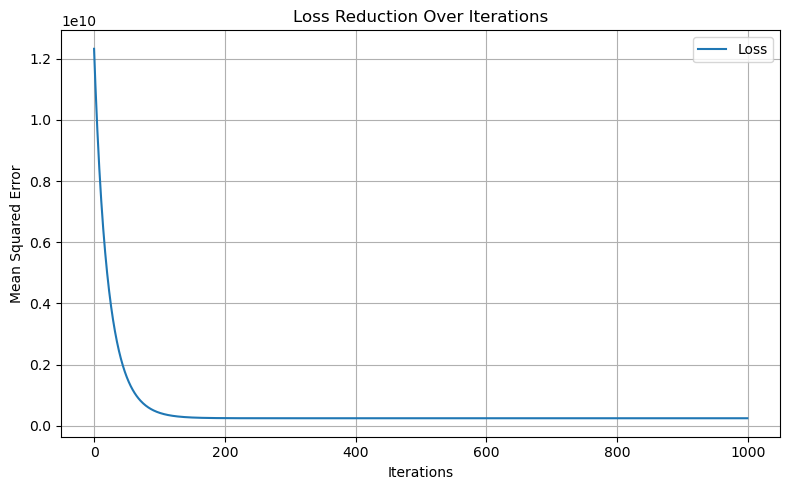

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Reduction Over Iterations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
y_pred = X_test_b.dot(theta)

In [38]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:",r2)
print("MAE:",mae)

R2 Score: 0.8928306306988757
MAE: 11214.768189723476


In [40]:
comparison_df = pd.DataFrame(X_test, columns=["Experience", "Age","Education Level"])

y_test_flat = y_test.flatten() 
y_pred_flat = y_pred.flatten()

comparison_df["Actual_Salary"] = y_test_flat
comparison_df["Predicted_Salary"] = y_pred_flat

print("Sample Comparison of Predictions:")
comparison_df.sample(10)

Sample Comparison of Predictions:


,Experience,Age,Education Level,Actual_Salary,Predicted_Salary
29,19.0,43.0,2.0,170000.0,147941.268791
52,13.0,44.0,1.0,130000.0,119553.266442
40,2.0,30.0,1.0,40000.0,48451.885515
59,6.0,32.0,2.0,100000.0,79935.591501
54,9.0,38.0,2.0,110000.0,105631.097842
16,5.0,32.0,1.0,90000.0,62589.654028
67,10.0,38.0,1.0,110000.0,93857.760102
30,3.0,28.0,1.0,45000.0,45459.316468
22,16.0,45.0,3.0,190000.0,159920.875711
28,13.0,40.0,2.0,120000.0,122555.166221
